# Sheet 03

Autoformatting if `jupyter-black` is installed.

In [ ]:
try:
    import black
    import jupyter_black

    jupyter_black.load(
        lab=False,
        line_length=79,
        verbosity="DEBUG",
        target_version=black.TargetVersion.PY310,
    )
except ImportError:
    pass

Import all we weed and more.

Set seaborn default theme

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import math as m
import plotly.express as px

Set seaborn default theme

In [8]:
sns.set_theme()

If needed tweak parameters of matplotlib.
Here we increase the size and dpi to bet a bigger but still high-res image.

In [9]:
mpl.rcParams["figure.dpi"] = 200
mpl.rcParams["figure.figsize"] = (20, 15)
%matplotlib inline

## Exercise 1

### a)

minimum p = x samples because then the matrix is quadratic, if x > p then we can use Moore Penrose Pseudo Inverse

### b)

In [24]:
df = pd.read_csv("data/LDA-input.csv")
lda = LinearDiscriminantAnalysis(solver="eigen")

In [25]:
mapped_df = df.drop(columns="class").copy()

In [26]:
mapped_df["class"] = df["class"].map({
    "C1": 1,
    "C2": 2,
    "C3": 3,
})

In [31]:
mapped_df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,class
0,-0.270712,0.104848,0.250528,-0.925200,0.567144,-1.040180,-0.153676,0.789852,-1.226216,-0.948007,1
1,-0.569654,-0.977150,-0.770632,-0.033711,-1.032859,1.142427,-0.609778,1.469416,1.492679,0.707125,1
2,-1.858490,-1.370624,-0.330106,-1.515290,1.200060,-1.822619,0.269385,-0.446424,1.114314,-1.380803,1
3,1.015425,0.224081,-0.644551,0.661532,1.292965,-0.895312,-0.568311,-2.111618,-0.818308,-0.962384,1
4,5.124502,0.108509,-0.439301,-0.713560,0.934181,0.058656,1.609714,0.859907,-0.985203,-0.958368,2
5,5.449109,-0.942463,0.158909,0.388076,0.437338,0.418230,-0.732185,-1.428283,-2.009217,-0.233440,2
6,6.803952,-1.948671,1.367851,-1.858739,-1.233951,-0.507570,1.407171,-0.941097,0.873505,1.135100,2
7,6.165984,0.049214,0.510947,0.631299,0.887702,0.057652,-0.329544,-2.832079,-1.182554,-0.054846,2
8,4.248352,6.510343,-0.171336,-0.458055,-1.338782,1.320063,-1.409329,-1.098297,-0.486751,-1.000971,3
9,4.773877,4.555783,-0.548712,1.080016,-0.752434,1.158795,0.750871,-1.262713,-0.790701,-0.170789,3


In [64]:
lda.fit(mapped_df.drop(columns="class"), mapped_df["class"])

LinearDiscriminantAnalysis(solver='eigen')

In [90]:
transformed_df = pd.DataFrame(lda.transform(mapped_df.drop(columns="class")), columns=["x", "y"])

<Axes: xlabel='x', ylabel='y'>

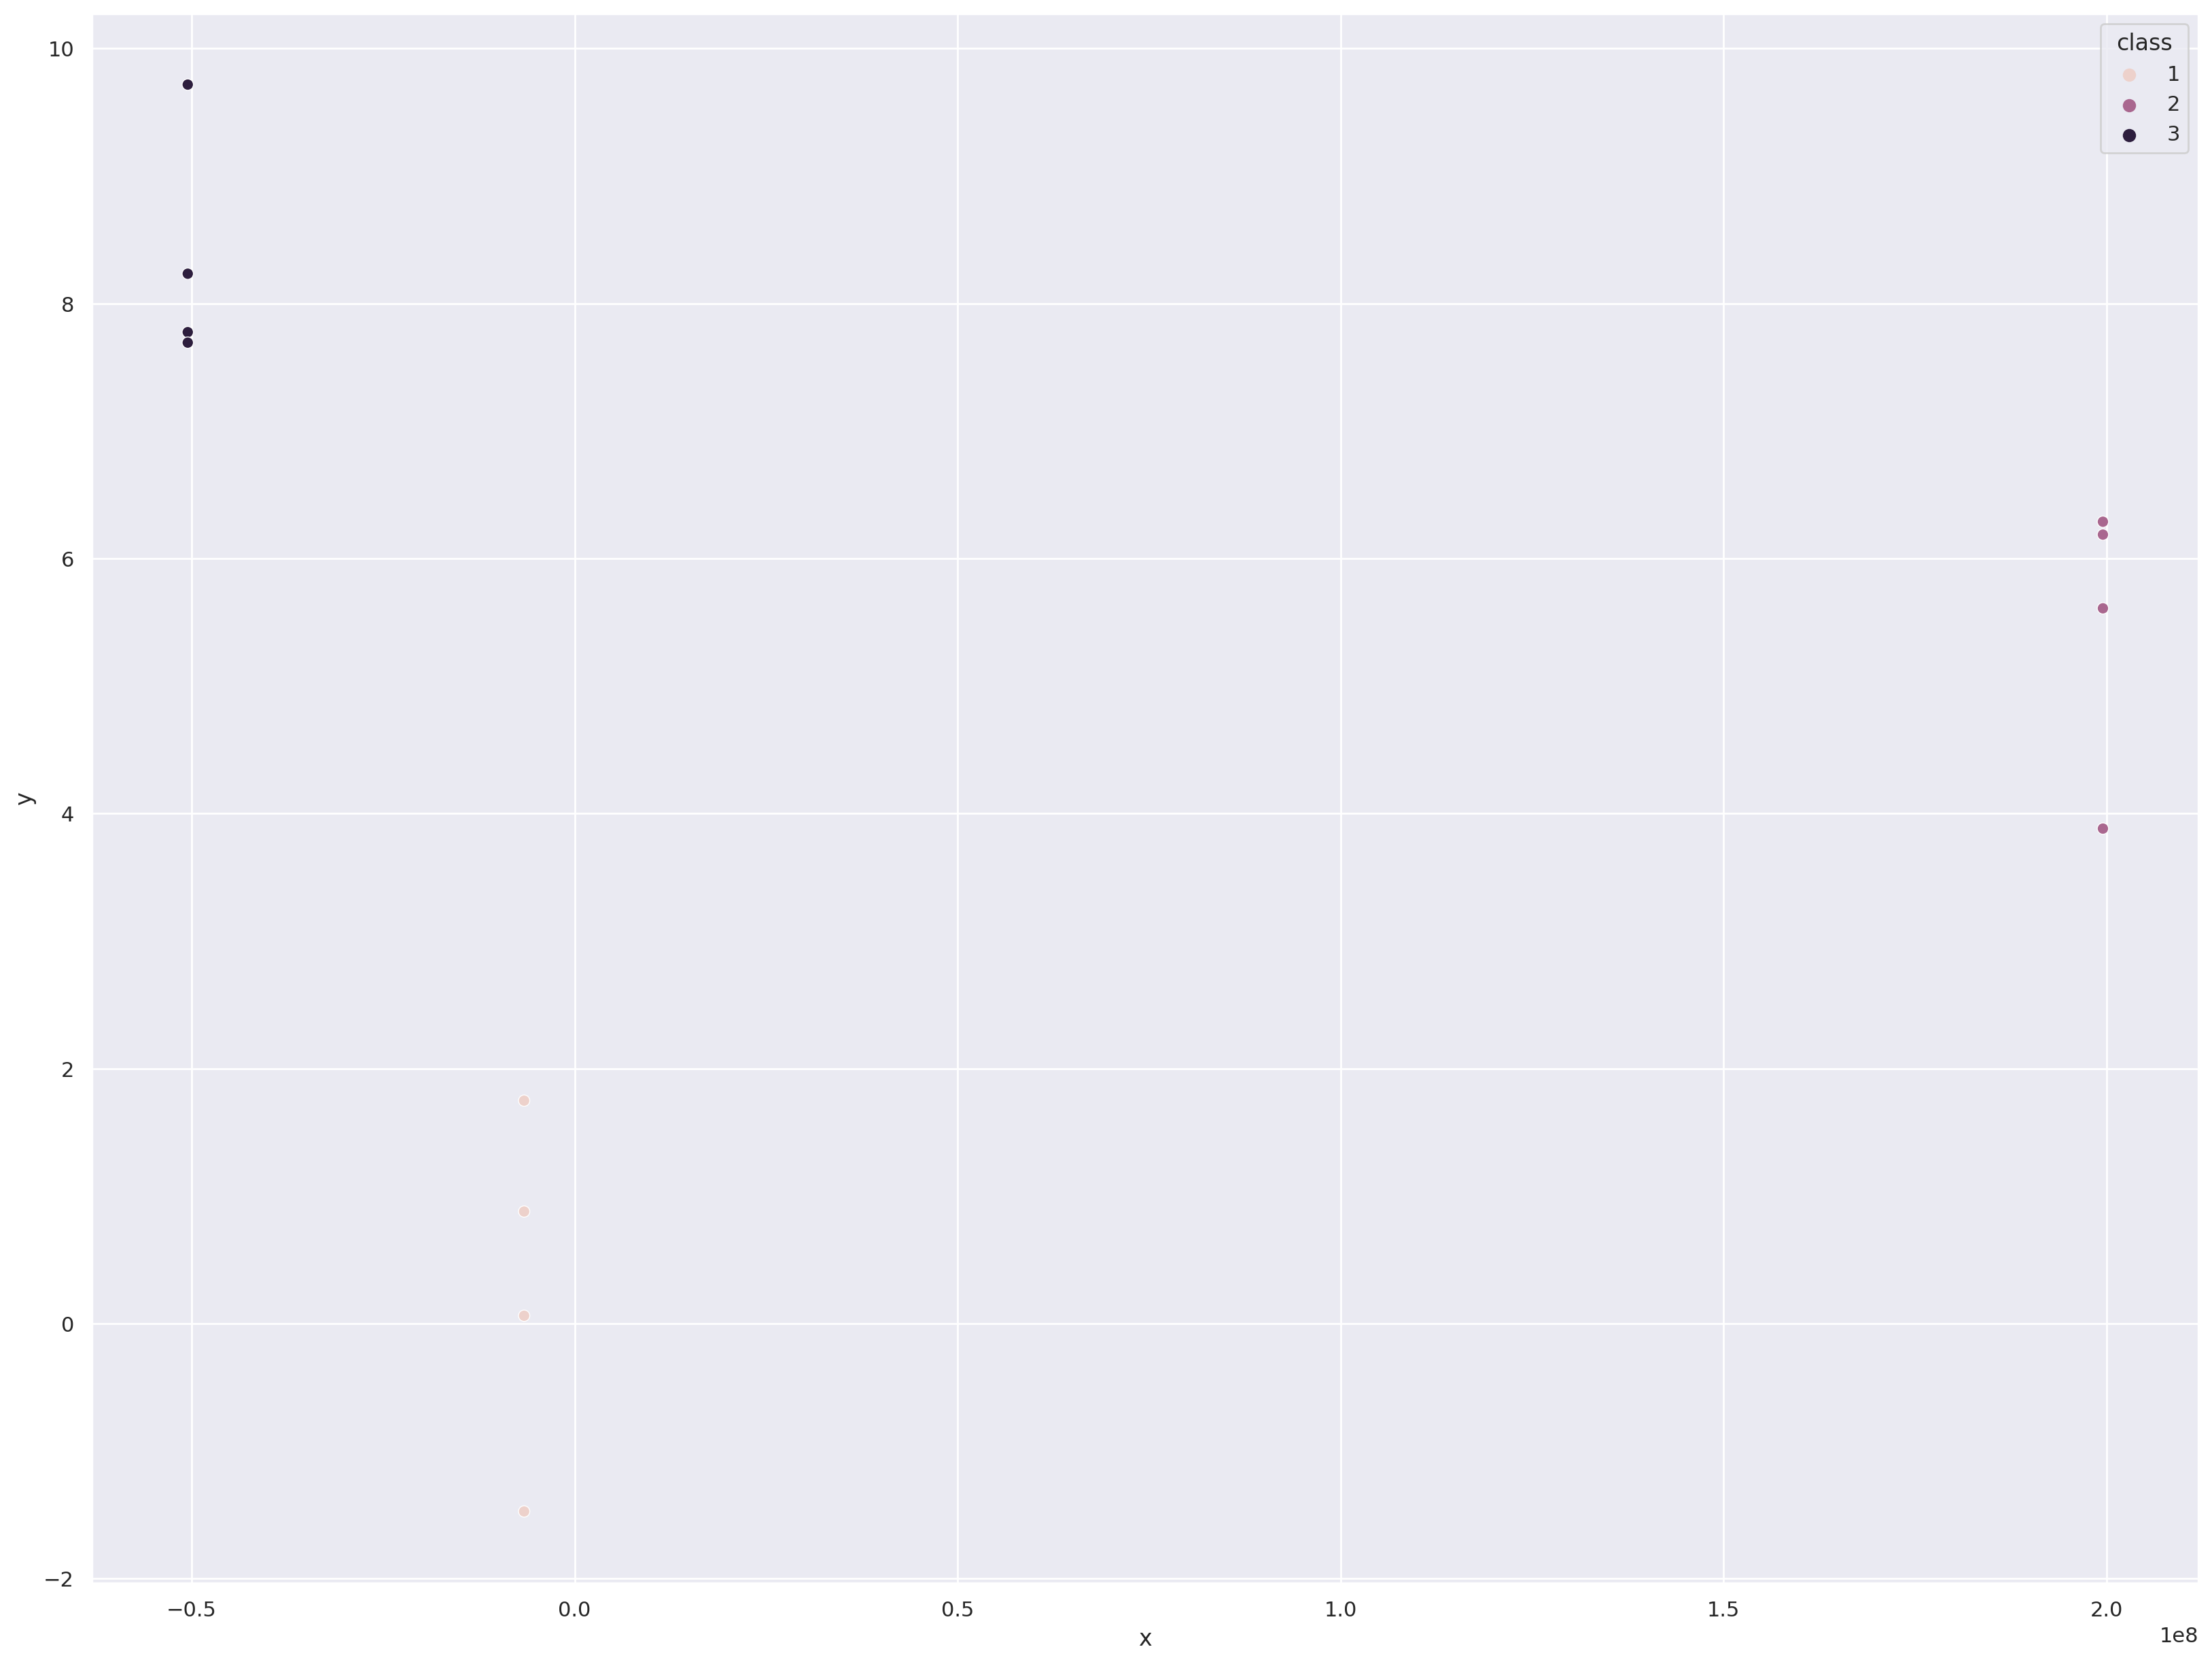

In [92]:
sns.scatterplot(x=transformed_df["x"], y=transformed_df["y"], hue=mapped_df["class"])

### c)

In [93]:
lda = LinearDiscriminantAnalysis(solver="eigen", shrinkage="auto")

In [94]:
lda.fit(mapped_df.drop(columns="class"), mapped_df["class"])

LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')

In [95]:
transformed_df = pd.DataFrame(lda.transform(mapped_df.drop(columns="class")), columns=["x", "y"])

<Axes: xlabel='x', ylabel='y'>

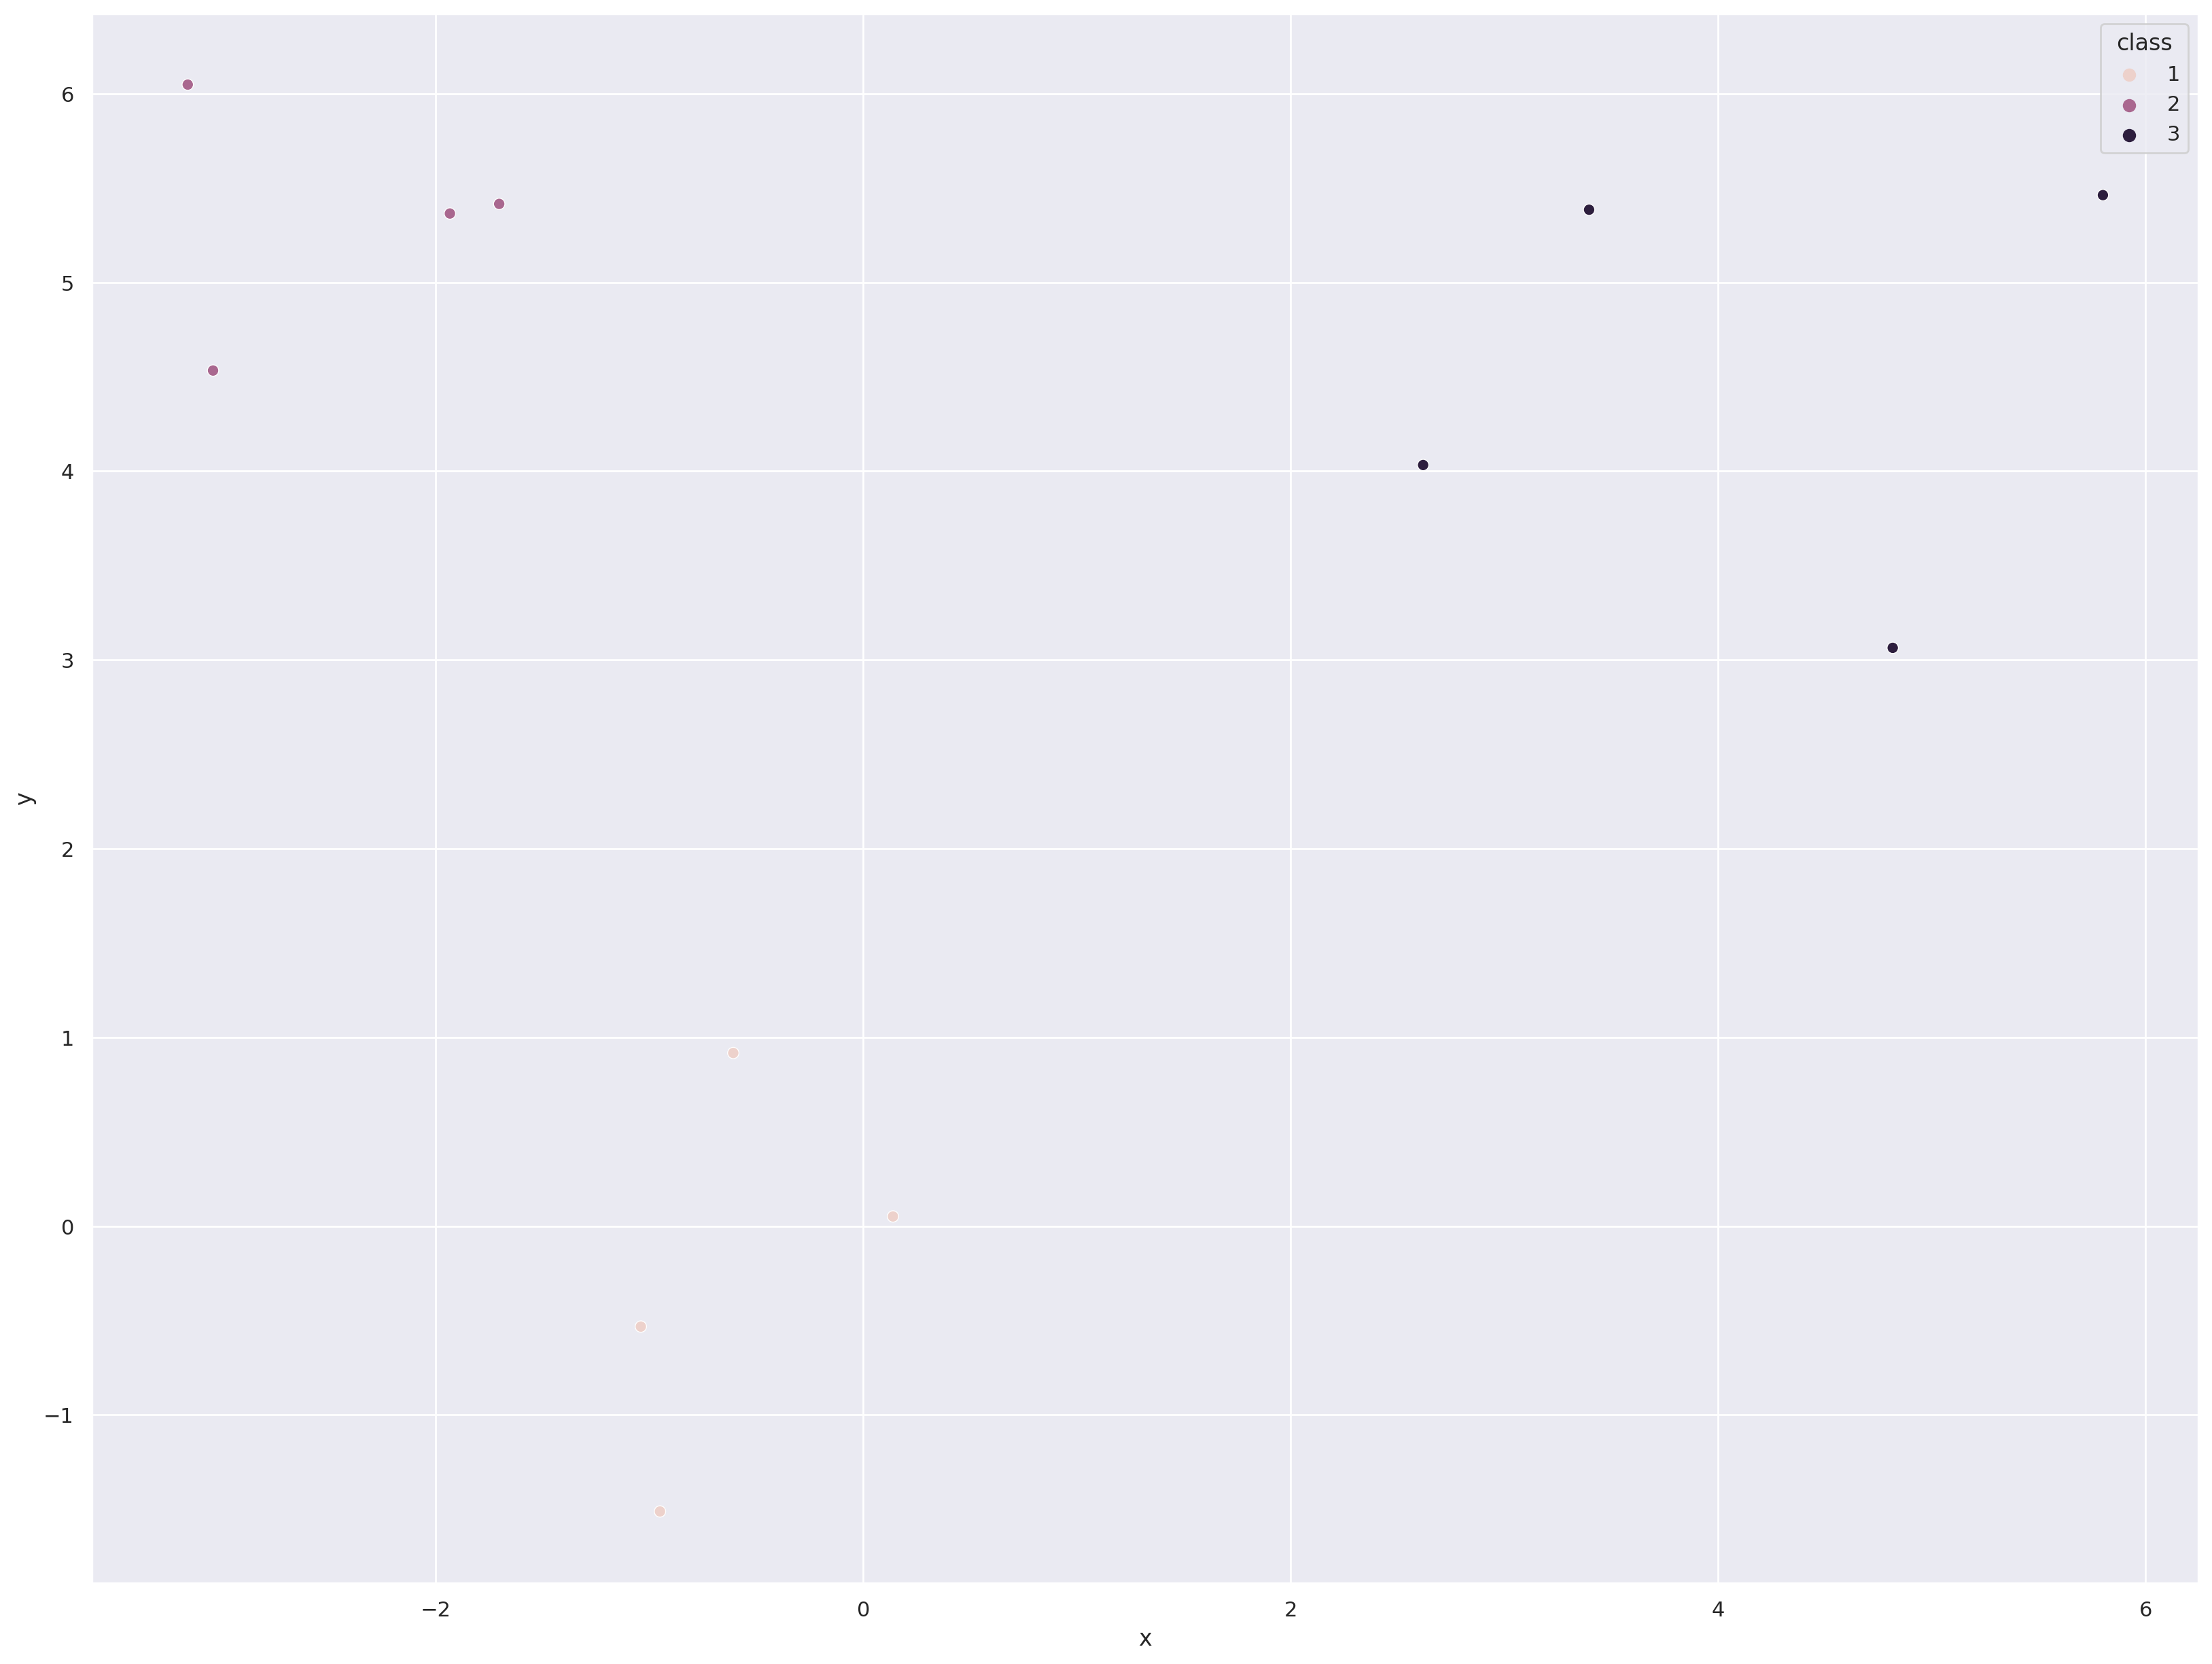

In [96]:
sns.scatterplot(x=transformed_df["x"], y=transformed_df["y"], hue=mapped_df["class"])

{'left_child':
    {'left_child':
        {'left_child':
            {'left_child': None, 'location': array([1, 3]), 'right_child': None},
        'location': array([2, 2]),
        'right_child':
            {'left_child': None, 'location': array([4, 1]), 'right_child': None}
        },
    'location': array([3, 6]),
    'right_child':
        {'left_child':
            {'left_child': None, 'location': array([1, 8]), 'right_child': None},
        'location': array([ 2, 10]),
        'right_child': None}
    },
'location': array([5, 4]),
'right_child':
    {'left_child':
        {'left_child':
            {'left_child': None, 'location': array([7, 4]),   'right_child': None},
        'location': array([8, 2]),
        'right_child':
            {'left_child': None, 'location': array([8, 5]), 'right_child': None}
        },
    'location': array([7, 7]),
    'right_child':
        {'left_child':
            {'left_child': None, 'location': array([6, 8]), 'right_child': None},
        'location': array([9, 9]),
        'right_child': None}
    }
}